# Titanic: Machine Learning from Disaster
## Kaggle Competition 

### Competition Description

The sinking of the RMS Titanic is one of the most infamous shipwrecks in history.  On April 15, 1912, during her maiden voyage, the Titanic sank after colliding with an iceberg, killing 1502 out of 2224 passengers and crew. This sensational tragedy shocked the international community and led to better safety regulations for ships.

One of the reasons that the shipwreck led to such loss of life was that there were not enough lifeboats for the passengers and crew. Although there was some element of luck involved in surviving the sinking, some groups of people were more likely to survive than others, such as women, children, and the upper-class.

In this challenge, we ask you to complete the analysis of what sorts of people were likely to survive. In particular, we ask you to apply the tools of machine learning to predict which passengers survived the tragedy.

## Data Ingestion
Let's start out by loading in the data. The Kaggle competition supplies both the training and test data in two .csv files. Download the data and simply point the Panda's read_csv to the file location. After loading in the data, I like to look at the first few lines to get an idea of the schema.

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns #visualizations
import scipy as scipy

trainpath = "/Users/jreinhart/Desktop/Data Analysis Github/Titanic Kaggle/train.csv"
testpath = "/Users/jreinhart/Desktop/Data Analysis Github/Titanic Kaggle/test.csv"

traindf = pd.read_csv(trainpath)
testdf = pd.read_csv(testpath)

In [2]:
traindf.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


As you can see, some of the feature names could be confusing if there wasn't any other documentation. Thankfully the Kaggle competition contained a data dictionary that explains what each feature represents.

#### FEATURE DESCRIPTIONS:

|Feature      |Description                                |
|:-----------:|:-----------------------------------------:|
|survived     |Survival (0 = No; 1 = Yes)                 |
|pclass       |Passenger Class (1 = 1st; 2 = 2nd; 3 = 3rd)|
|name         |   Name                                    |
|sex          |   Sex                                     |
|age          |   Age                                     |
|sibsp        |   Number of Siblings/Spouses Aboard       |
|parch        |   Number of Parents/Children Aboard       |
|ticket       |   Ticket Number                           |
|fare         |   Passenger Fare                          |
|cabin        |   Cabin                                   |
|embarked     |Port of Embarkation(C = Cherbourg; Q = Queenstown; S = Southampton)|

SPECIAL NOTES:
Pclass is a proxy for socio-economic status (SES)
 1st ~ Upper; 2nd ~ Middle; 3rd ~ Lower

Age is in Years; Fractional if Age less than One (1)
 If the Age is Estimated, it is in the form xx.5

With respect to the family relation variables (i.e. sibsp and parch)
some relations were ignored.  The following are the definitions used
for sibsp and parch.

Sibling:  Brother, Sister, Stepbrother, or Stepsister of Passenger Aboard Titanic
Spouse:   Husband or Wife of Passenger Aboard Titanic (Mistresses and Fiances Ignored)
Parent:   Mother or Father of Passenger Aboard Titanic
Child:    Son, Daughter, Stepson, or Stepdaughter of Passenger Aboard Titanic

Other family relatives excluded from this study include cousins,
nephews/nieces, aunts/uncles, and in-laws.  Some children travelled
only with a nanny, therefore parch=0 for them.  As well, some
travelled with very close friends or neighbors in a village, however,
the definitions do not support such relations.

## Initial Exploration

After loading up a new dataset it is often helpful to do some initial exploration of the data to get an idea of how "clean" the data is and note any obvious patterns. One of the easiest ways to do this in Pandas is through the .describe method. The describe method generates various summary statistics, excluding any missing/null values.

In [3]:
traindf.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [4]:
testdf.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


By simply running the describe method we can learn quite a bit about our training and test sets. First, we can tell that our training set is about twice as large as our test set. Second, by looking at the "counts" we know that there are missing values that will need to be addressed in order to run any classifier algorithms. We can also get an idea of the average age, fare, and family size of the passengers. 

Let's create some initial visualizations of our training set to see if any obvious patterns of survival emerge:

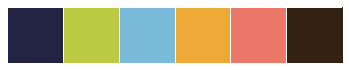

In [5]:
patagonia_colors = ["#222343", "#bbca42", "#7abbdb", "#eca935", "#ec7869", "#332212"]
current_palette = sns.color_palette(patagonia_colors)
sns.palplot(current_palette)
sns.set_palette(current_palette)
sns.set_context("talk")
sns.set_style("white")
sns.set_style("ticks")

Now that we have our plots formatted, let's get started by first comparing how many passengers in our training data survived.

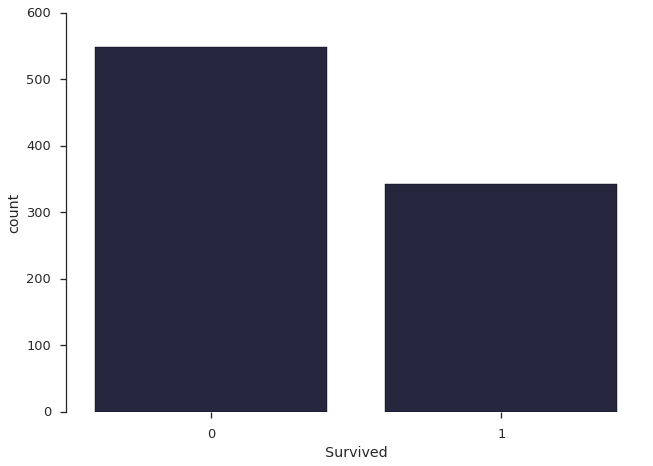

In [6]:
sns.countplot(x="Survived", data=traindf, color="#222343")
sns.despine(bottom=True)

As expected there are more people who died than survived in the training data. Let's look a little deeper to see if there are any features that increase your chances of surviving. Even if all you know about the Titanic disaster was learned from the movie Titanic, you would know they tried to save women and children first. Let's take a look at the number of survivors by gender and age:

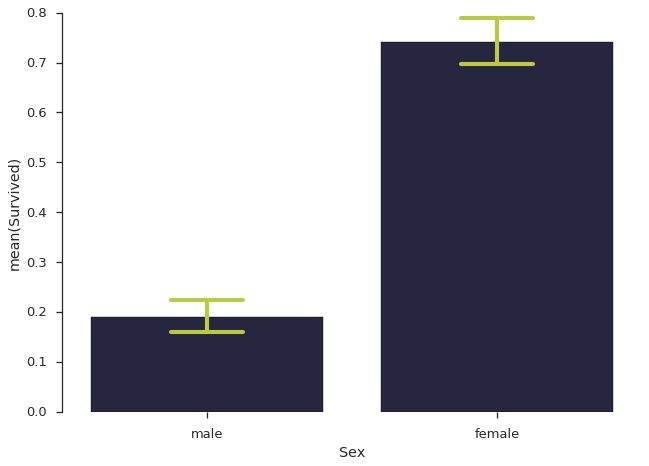

In [7]:
sns.barplot(x="Sex", y="Survived", capsize=.25, color="#222343", errcolor="#bbca42", data=traindf)
sns.despine(bottom=True)

The plot above shows the percentage of male and female passengers in the training set that survived. We can see that being female drastically increases a passenger's survival chances (~75% of females live vs. ~20% of males live). Let's see how age affects survival within the two sexs:

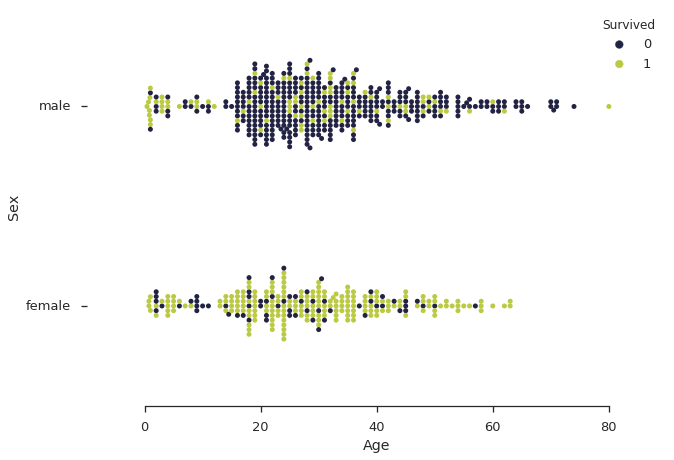

In [8]:
sns.swarmplot(x="Age", y="Sex", hue="Survived", data=traindf)
sns.despine(trim=True, left=True)

The swarmplot above is a useful way of looking at data when you want to look at the individual observations along with some representation of the underlying distribution. This plot is particularly useful for examining this dataset, because it allows us to quickly determine survival rate by both Age and Sex. For example, we can see that the chances of a male surviving are very low when compared to a female. However this does not apply to young males. It looks like being a child (no matter the Sex) drastically increased a passengers chances of survival. We can also see that there are more males than females in our dataset and that the distribution of ages is older for males than females. By looking at the proportion of green to blue dots it is easy to see why a simple gender model scores so well for this challenge!

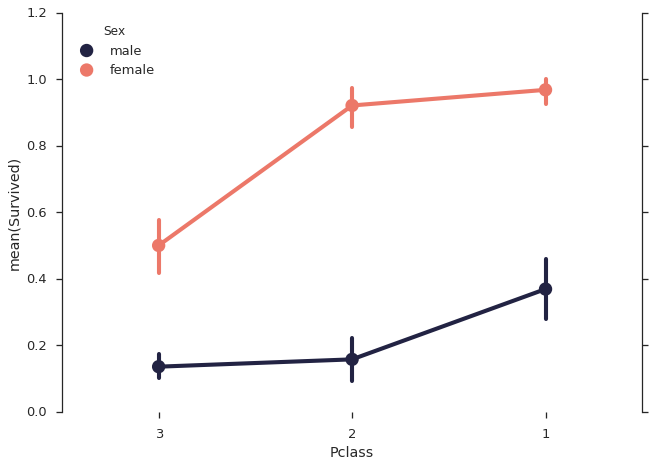

In [9]:
#Lines on markers represent 95% ci
sns.pointplot(x="Pclass", y="Survived", hue="Sex", palette=["#222343","#ec7869"], order=[3,2,1], data=traindf)
sns.despine(bottom=True, right=False)

The slopegraph above shows the increase in average survival rate when examining Passenger Class. From the graph, it appears that being a female in either first or second class all but guaranteed your survival. The survival rate of females in third class is about half as high as females in first or second class. However, females in third class still have more than double the survival rate of males in thrid class. While there is some increase in the survival rate of males from second to third class, the likelihood of a male surviving is still below 50%.

## Data Wrangling / Munging

We know from running the describe method earlier that there are some missing values in our dataset that need to be addressed. Let's look at those missing values a little closer:

In [10]:
print traindf.isnull().sum()
print "\n" 
print testdf.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


In [11]:
combined = traindf.append(testdf)

In [12]:
combined.describe()

,Age,Fare,Parch,PassengerId,Pclass,SibSp,Survived
count,1046.000000,1308.000000,1309.000000,1309.000000,1309.000000,1309.000000,891.000000
mean,29.881138,33.295479,0.385027,655.000000,2.294882,0.498854,0.383838
std,14.413493,51.758668,0.865560,378.020061,0.837836,1.041658,0.486592
min,0.170000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000
25%,21.000000,7.895800,0.000000,328.000000,2.000000,0.000000,0.000000
50%,28.000000,14.454200,0.000000,655.000000,3.000000,0.000000,0.000000
75%,39.000000,31.275000,0.000000,982.000000,3.000000,1.000000,1.000000
max,80.000000,512.329200,9.000000,1309.000000,3.000000,8.000000,1.000000


In [13]:
combined.tail(5)

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket
413,NaN,NaN,S,8.0500,"Spector, Mr. Woolf",0,1305,3,male,0,NaN,A.5. 3236
414,39.0,C105,C,108.9000,"Oliva y Ocana, Dona. Fermina",0,1306,1,female,0,NaN,PC 17758
415,38.5,NaN,S,7.2500,"Saether, Mr. Simon Sivertsen",0,1307,3,male,0,NaN,SOTON/O.Q. 3101262
416,NaN,NaN,S,8.0500,"Ware, Mr. Frederick",0,1308,3,male,0,NaN,359309
417,NaN,NaN,C,22.3583,"Peter, Master. Michael J",1,1309,3,male,1,NaN,2668


In [14]:
combined.isnull().sum()

Age             263
Cabin          1014
Embarked          2
Fare              1
Name              0
Parch             0
PassengerId       0
Pclass            0
Sex               0
SibSp             0
Survived        418
Ticket            0
dtype: int64

Because the training dataset is relatively small, I combined the training and test dataset into a new "combined" dataset will be used to interpolate the missing values. I believe this gives the best chance at an accurate result for filling in the missing values. This step may not be necessary for problems with a large training set.

From the table above, we can see that the Cabin feature has the highest number of missing values. Because this is a categorical variable, I decided to simply create a new category, "U" for unknown. I didn't see the importance of noting the individual room of each passenger, so in order to simplify the feature, I simply took the first letter of the Cabin. The first letter should indicate the deck of the ship where the passenger's room was located. The code below fills in "na" for values with "U" and then maps a labmda function that replaces each cabin number with the first letter of the entry. i.e. C105 becomes "C" 

In [15]:
#Replaces value of missing cabin with U for unknown
combined.Cabin.fillna("U",inplace=True) 

# mapping each Cabin value with the cabin letter
combined['Cabin'] = combined['Cabin'].map(lambda c : c[0])

combined.tail(5)

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket
413,NaN,U,S,8.0500,"Spector, Mr. Woolf",0,1305,3,male,0,NaN,A.5. 3236
414,39.0,C,C,108.9000,"Oliva y Ocana, Dona. Fermina",0,1306,1,female,0,NaN,PC 17758
415,38.5,U,S,7.2500,"Saether, Mr. Simon Sivertsen",0,1307,3,male,0,NaN,SOTON/O.Q. 3101262
416,NaN,U,S,8.0500,"Ware, Mr. Frederick",0,1308,3,male,0,NaN,359309
417,NaN,U,C,22.3583,"Peter, Master. Michael J",1,1309,3,male,1,NaN,2668


Now that we have our Cabin feature completed, let's see what the survival rate of passengers is broken down by cabin:

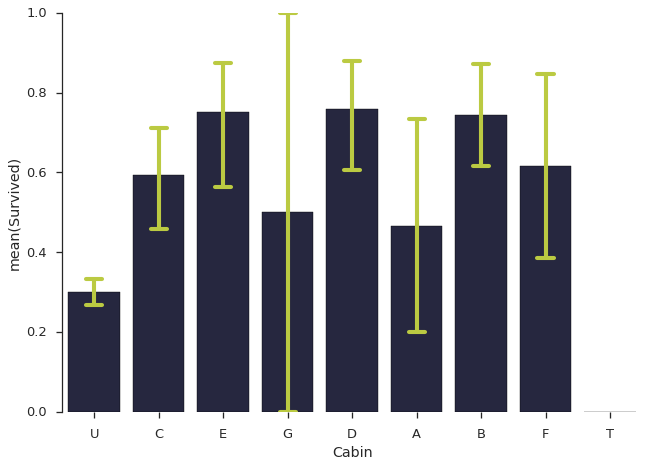

In [16]:
sns.barplot(x="Cabin",y="Survived", capsize=.25, color="#222343", errcolor="#bbca42", data = combined)
sns.despine(trim=True, bottom=True)

From the graph above it looks like the survival rates of known Cabins is about twice as high as the unknown ("U") cabin. Furthermore the survival rate of konwn cabins looks to be somewhere between .5 and .8. Because the biggest difference in survival rate appears to be between unknown and any known Cabin, I debated combining the features categories into a simple boolean of known cabin or unknown cabin. While I ultimately decided to leave the Cabins information broken out, combining the cabins could simplify the model without loosing much information.

Now that we have the Cabin feature finalized, let's look at Sex. The code below changes the "male", "female" strings into simple 1s and 0s which are more friendly to machine learning models.

In [17]:
combined = combined.replace(["male","female"],[1,0])
combined.tail(5)

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket
413,NaN,U,S,8.0500,"Spector, Mr. Woolf",0,1305,3,1,0,NaN,A.5. 3236
414,39.0,C,C,108.9000,"Oliva y Ocana, Dona. Fermina",0,1306,1,0,0,NaN,PC 17758
415,38.5,U,S,7.2500,"Saether, Mr. Simon Sivertsen",0,1307,3,1,0,NaN,SOTON/O.Q. 3101262
416,NaN,U,S,8.0500,"Ware, Mr. Frederick",0,1308,3,1,0,NaN,359309
417,NaN,U,C,22.3583,"Peter, Master. Michael J",1,1309,3,1,1,NaN,2668


In [18]:
combined.isnull().sum()

Age            263
Cabin            0
Embarked         2
Fare             1
Name             0
Parch            0
PassengerId      0
Pclass           0
Sex              0
SibSp            0
Survived       418
Ticket           0
dtype: int64

We're getting closer, let's look at the two missing Embarked values next.

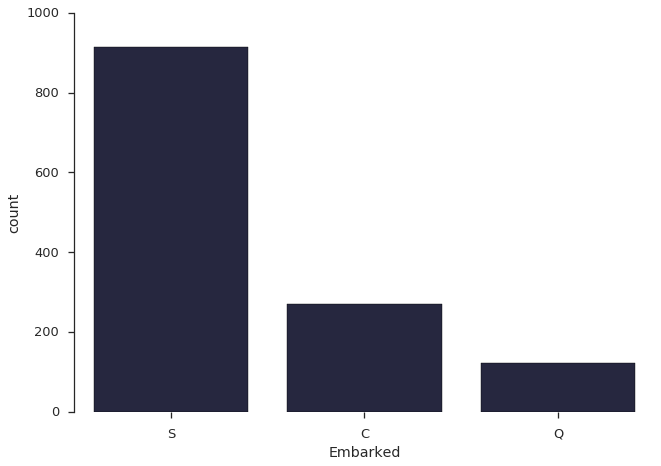

In [19]:
sns.countplot(x="Embarked", data=combined, color="#222343")
sns.despine(trim=True, bottom=True)

Since we are only missing values in 2 out of the 1309 entries in the combined dataset for the Embarked feature, I chose to simply fill the missing value with the most common value. The graph above shows that the vast majority of passengers Embarked at Southampton "S" so let's fill the missing values with "S"

In [20]:
combined.Embarked = combined.Embarked.fillna("S")

In [21]:
combined.isnull().sum()

Age            263
Cabin            0
Embarked         0
Fare             1
Name             0
Parch            0
PassengerId      0
Pclass           0
Sex              0
SibSp            0
Survived       418
Ticket           0
dtype: int64

So far we have cleaned up the values for categorical variables, but we still have to tackle the continuous variables of fare and age. Let's look at the one missing Fare value next. Because there is only one missing value, there isn't a need to get super fancy on filling in this value (since it will not have a large effect on our data overall). However, we know that fare is probably closely correlated to the demographics of the passenger and the passenger class of the ticket. Let's look at the passenger who does not have Fare information:

In [22]:
combined[combined['Fare'].isnull()]

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket
152,60.5,U,S,NaN,"Storey, Mr. Thomas",0,1044,3,1,0,NaN,3701


We now know that the missing Fare belongs to Mr. Thomas Storey, a 60 year old male that bought a third class ticket in Southampton. Using this information we can see what the median ticket price is for similar passengers.

In [23]:
grouped = combined.groupby(['Sex','Pclass','Embarked'])
grouped.median()

Age      Fare  Parch  PassengerId  SibSp  Survived
Sex Pclass Embarked                                                      
0   1      C         38.00  83.15830    0.0        701.0    0.0       1.0
           Q         35.00  90.00000    0.0        858.0    1.0       1.0
           S         35.00  79.65000    0.0        731.0    1.0       1.0
    2      C         23.00  27.72080    0.0        867.0    1.0       1.0
           Q         30.00  12.35000    0.0        313.5    0.0       1.0
           S         28.00  23.00000    0.0        581.0    0.0       1.0
    3      C         15.00  14.45420    1.0        645.0    0.0       1.0
           Q         22.00   7.75000    0.0        669.5    0.0       1.0
           S         22.00  13.77500    0.0        568.0    1.0       0.0
1   1      C         39.00  62.66875    0.0        690.5    0.0       0.0
           Q         44.00  90.00000    0.0        246.0    2.0       0.0
           S         42.00  35.50000    0.0        624.0    0.0       0.0
    2      C         29.00  15.04580    0.0        818.0    0.0       0.0
           Q         59.00  12.35000    0.0        908.0    0.0       0.0
           S         29.00  13.00000    0.0        696.0    0.0       0.0
    3      C         24.25   7.22920    0.0        747.5    0.0       0.0
           Q         25.00   7.75000    0.0        704.0    0.0       0.0
           S         25.00   8.05000    0.0        638.5    0.0       0.0

By grouping by Sex, Pclass, and Embarked, we can see that the median ticket price paid by a third class male that departed from Southampton was $8.05. We'll use that value to fill in the missing fare:

In [24]:
combined.Fare = combined.Fare.fillna(8.05)
combined.isnull().sum()

Age            263
Cabin            0
Embarked         0
Fare             0
Name             0
Parch            0
PassengerId      0
Pclass           0
Sex              0
SibSp            0
Survived       418
Ticket           0
dtype: int64

We now have filled in values for everything except Age. From the swarmplot earlier, we know that Age is an important variable in determining whether or not a passenger survives (most male children survive, most adult males parish). Therefore, we should try our best to fill in age using all the information available to us. To do this we can use K nearest neighbors to impute the missing age values. In order to implement a KNN regressor, we first have to change our categorical variables into dummy variables (since that is what the model expects as an input). The code below gets dummy values for Cabin, Embarked, and Pclass:

In [25]:
col = ["Cabin","Embarked","Pclass"]
combined = pd.get_dummies(combined,columns=col)

The final feature engineering I did was to combine the sibling/spouses (SibSp) aboard and the parent/children aboard (Parch) features into one "Party Size" feature. My thought was that families might have a greater chance of surviving than people traveling alone. Combining the two columns is pretty simple in Pandas as shown below:

In [26]:
combined["Party_Size"] = combined["SibSp"] + combined["Parch"] + 1
combined.head(5)

,Age,Fare,Name,Parch,PassengerId,Sex,SibSp,Survived,Ticket,Cabin_A,...,Cabin_G,Cabin_T,Cabin_U,Embarked_C,Embarked_Q,Embarked_S,Pclass_1,Pclass_2,Pclass_3,Party_Size
0,22.0,7.2500,"Braund, Mr. Owen Harris",0,1,1,1,0.0,A/5 21171,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,2
1,38.0,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,0,1,1.0,PC 17599,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,2
2,26.0,7.9250,"Heikkinen, Miss. Laina",0,3,0,0,1.0,STON/O2. 3101282,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1
3,35.0,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,0,1,1.0,113803,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,2
4,35.0,8.0500,"Allen, Mr. William Henry",0,5,1,0,0.0,373450,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1


I then binned the party size variable into solo travelors (0-1], small parties (1-4], and large parties (4-12]:

In [27]:
party_bins = [0,1,4,12]
party_dummies = pd.get_dummies(pd.cut(combined["Party_Size"], bins=party_bins))
combined = pd.concat([combined, party_dummies], axis=1)
combined.head(5)

,Age,Fare,Name,Parch,PassengerId,Sex,SibSp,Survived,Ticket,Cabin_A,...,Embarked_C,Embarked_Q,Embarked_S,Pclass_1,Pclass_2,Pclass_3,Party_Size,"(0, 1]","(1, 4]","(4, 12]"
0,22.0,7.2500,"Braund, Mr. Owen Harris",0,1,1,1,0.0,A/5 21171,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,2,0.0,1.0,0.0
1,38.0,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,0,1,1.0,PC 17599,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,2,0.0,1.0,0.0
2,26.0,7.9250,"Heikkinen, Miss. Laina",0,3,0,0,1.0,STON/O2. 3101282,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,1,1.0,0.0,0.0
3,35.0,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,0,1,1.0,113803,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,2,0.0,1.0,0.0
4,35.0,8.0500,"Allen, Mr. William Henry",0,5,1,0,0.0,373450,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,1,1.0,0.0,0.0


In [28]:
combined.rename(columns={'(0, 1]':'Solo', '(1, 4]':'SmallFam', '(4, 12]':'LargeFam'}, inplace = True)
combined.columns

Index([u'Age', u'Fare', u'Name', u'Parch', u'PassengerId', u'Sex', u'SibSp',
       u'Survived', u'Ticket', u'Cabin_A', u'Cabin_B', u'Cabin_C', u'Cabin_D',
       u'Cabin_E', u'Cabin_F', u'Cabin_G', u'Cabin_T', u'Cabin_U',
       u'Embarked_C', u'Embarked_Q', u'Embarked_S', u'Pclass_1', u'Pclass_2',
       u'Pclass_3', u'Party_Size', u'Solo', u'SmallFam', u'LargeFam'],
      dtype='object')

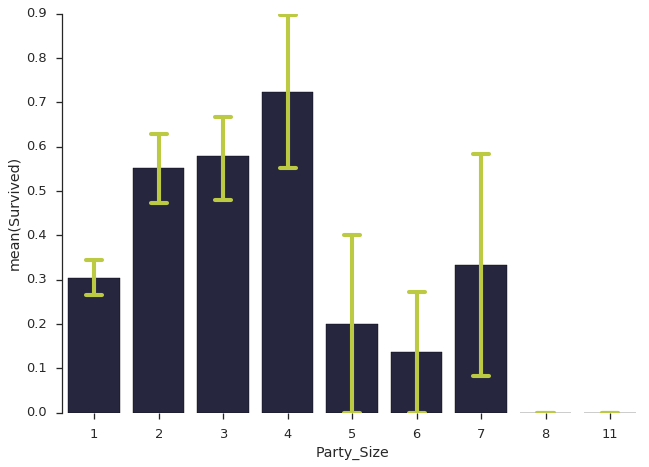

In [29]:
sns.barplot(x='Party_Size', y='Survived', capsize=.25, color="#222343", errcolor="#bbca42", data=combined)
sns.despine(bottom=True)

We're now ready to impute our null Age values. The code below splits the combined dataset into a train and test set based on whether or not the Age feature is null:

In [30]:
AgeTrain = combined[combined['Age'].notnull()]
AgeTest = combined[combined['Age'].isnull()]

In [31]:
AgeTest.describe()

,Age,Fare,Parch,PassengerId,Sex,SibSp,Survived,Cabin_A,Cabin_B,Cabin_C,...,Embarked_C,Embarked_Q,Embarked_S,Pclass_1,Pclass_2,Pclass_3,Party_Size,Solo,SmallFam,LargeFam
count,0.0,263.000000,263.000000,263.000000,263.000000,263.000000,177.000000,263.000000,263.000000,263.000000,...,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.00000,263.000000
mean,NaN,19.823319,0.243346,653.558935,0.703422,0.482890,0.293785,0.011407,0.007605,0.030418,...,0.220532,0.277567,0.501901,0.148289,0.060837,0.790875,1.726236,0.760456,0.18251,0.057034
std,NaN,27.550667,0.949941,380.161812,0.457620,1.448443,0.456787,0.106394,0.087038,0.172063,...,0.415396,0.448652,0.500950,0.356064,0.239486,0.407460,2.017376,0.427619,0.38700,0.232350
min,NaN,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.00000,0.000000
25%,NaN,7.750000,0.000000,335.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.00000,0.000000
50%,NaN,8.050000,0.000000,630.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.00000,0.000000
75%,NaN,22.804150,0.000000,999.500000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.00000,0.000000
max,NaN,227.525000,9.000000,1309.000000,1.000000,8.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,11.000000,1.000000,1.00000,1.000000


I only want to use features that I believe would be predictive of a passenger's age. Therefore I dropped the columns below (note: I decided to use the Party Size feature instead of the binned solo, small fam, large fam features):

In [32]:
dropcolumns = ["Name","PassengerId","Survived","Ticket","Age", "Solo", "SmallFam", "LargeFam"]
AgeTrainX = AgeTrain.drop(dropcolumns, axis=1)
AgeTrainY = AgeTrain["Age"]
AgeTestX = AgeTest.drop(dropcolumns, axis=1)

The code below imports and trains the K nearest neighbor regressor model:

In [33]:
from sklearn import preprocessing
AgeTrainX = preprocessing.scale(AgeTrainX)
AgeTestX = preprocessing.scale(AgeTestX)

In [34]:
from sklearn import neighbors
knnclass = neighbors.KNeighborsRegressor(n_neighbors=2)

knnclass.fit(AgeTrainX,AgeTrainY)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=1, n_neighbors=2, p=2,
          weights='uniform')

In [35]:
predage = knnclass.predict(AgeTrainX)

In [36]:
from sklearn import metrics
metrics.median_absolute_error(AgeTrainY,predage)

6.0

I first fit the model on AgeTrainX and AgeTrainY. This trains the model on all known entries with an Age Value. When I try to then "predict" the value of the known ages using the fitted model, there is a median error of 6 years. Not too shabby. The code below looks at the first ten predictions compared to the actual values:

In [37]:
print predage[:10]
print np.array(AgeTrainY[:10])

[ 19.5  36.5  26.5  26.5  27.5  50.5   4.   31.5  19.    2.5]
[ 22.  38.  26.  35.  35.  54.   2.  27.  14.   4.]


Now that we have a fitted model, let's predict the ages of our test set:

In [38]:
imputedage = knnclass.predict(AgeTestX)
imputedage

array([ 29.75 ,  33.5  ,  27.5  ,  34.   ,  17.5  ,  19.   ,  31.5  ,
        17.5  ,  34.   ,  34.   ,  29.75 ,  30.75 ,  17.5  ,  22.5  ,
        51.   ,  55.5  ,  13.5  ,  19.   ,  29.75 ,  17.5  ,  29.75 ,
        29.75 ,  19.   ,  19.   ,  24.5  ,  29.75 ,  19.   ,  18.5  ,
        15.   ,  19.5  ,  29.75 ,  11.5  ,  30.5  ,  22.5  ,  17.5  ,
        13.   ,  32.   ,  29.5  ,  24.5  ,  19.   ,  17.5  ,  11.5  ,
        36.5  ,  19.   ,   5.5  ,  17.5  ,  14.75 ,  24.5  ,  19.5  ,
        36.   ,  19.   ,  17.5  ,  22.5  ,  17.5  ,  21.5  ,  29.5  ,
        55.5  ,  51.   ,  17.5  ,  22.5  ,  44.75 ,  29.75 ,  43.5  ,
        11.5  ,  20.   ,  42.   ,  19.   ,  24.5  ,  51.   ,  34.   ,
        17.5  ,  17.5  ,  30.75 ,  27.5  ,  17.5  ,  36.   ,  19.   ,
        19.5  ,   5.5  ,  19.   ,  19.5  ,  21.5  ,  17.5  ,  34.   ,
        19.5  ,  19.   ,  24.5  ,  29.75 ,  30.75 ,  29.75 ,  57.   ,
        19.   ,  29.75 ,  21.5  ,  19.5  ,  19.5  ,  29.5  ,  21.5  ,
         5.5  ,  30.

In [39]:
AgeTest["Age"] = imputedage

/Applications/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [40]:
AgeTest

,Age,Fare,Name,Parch,PassengerId,Sex,SibSp,Survived,Ticket,Cabin_A,...,Embarked_C,Embarked_Q,Embarked_S,Pclass_1,Pclass_2,Pclass_3,Party_Size,Solo,SmallFam,LargeFam
5,29.75,8.4583,"Moran, Mr. James",0,6,1,0,0.0,330877,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,1,1.0,0.0,0.0
17,33.50,13.0000,"Williams, Mr. Charles Eugene",0,18,1,0,1.0,244373,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,1,1.0,0.0,0.0
19,27.50,7.2250,"Masselmani, Mrs. Fatima",0,20,0,0,1.0,2649,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,1,1.0,0.0,0.0
26,34.00,7.2250,"Emir, Mr. Farred Chehab",0,27,1,0,0.0,2631,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,1,1.0,0.0,0.0
28,17.50,7.8792,"O'Dwyer, Miss. Ellen ""Nellie""",0,29,0,0,1.0,330959,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,1,1.0,0.0,0.0
29,19.00,7.8958,"Todoroff, Mr. Lalio",0,30,1,0,0.0,349216,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,1,1.0,0.0,0.0
31,31.50,146.5208,"Spencer, Mrs. William Augustus (Marie Eugenie)",0,32,0,1,1.0,PC 17569,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,2,0.0,1.0,0.0
32,17.50,7.7500,"Glynn, Miss. Mary Agatha",0,33,0,0,1.0,335677,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,1,1.0,0.0,0.0
36,34.00,7.2292,"Mamee, Mr. Hanna",0,37,1,0,1.0,2677,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,1,1.0,0.0,0.0
42,34.00,7.8958,"Kraeff, Mr. Theodor",0,43,1,0,0.0,349253,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,1,1.0,0.0,0.0


We've filled in the missing values now we have to combine the test data back in with the training data, sort by passenger ID and then split the data back into the original training and test sets:

In [41]:
finalcombined = AgeTrain.append(AgeTest).sort_values(by='PassengerId',ascending=1)

In [42]:
finalcombined.isnull().sum()

Age              0
Fare             0
Name             0
Parch            0
PassengerId      0
Sex              0
SibSp            0
Survived       418
Ticket           0
Cabin_A          0
Cabin_B          0
Cabin_C          0
Cabin_D          0
Cabin_E          0
Cabin_F          0
Cabin_G          0
Cabin_T          0
Cabin_U          0
Embarked_C       0
Embarked_Q       0
Embarked_S       0
Pclass_1         0
Pclass_2         0
Pclass_3         0
Party_Size       0
Solo             0
SmallFam         0
LargeFam         0
dtype: int64

In [43]:
FinalTrain = finalcombined[finalcombined['Survived'].notnull()]
FinalTest = finalcombined[finalcombined['Survived'].isnull()]
FinalTest.tail(5)

,Age,Fare,Name,Parch,PassengerId,Sex,SibSp,Survived,Ticket,Cabin_A,...,Embarked_C,Embarked_Q,Embarked_S,Pclass_1,Pclass_2,Pclass_3,Party_Size,Solo,SmallFam,LargeFam
413,29.75,8.0500,"Spector, Mr. Woolf",0,1305,1,0,NaN,A.5. 3236,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,1,1.0,0.0,0.0
414,39.00,108.9000,"Oliva y Ocana, Dona. Fermina",0,1306,0,0,NaN,PC 17758,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,1,1.0,0.0,0.0
415,38.50,7.2500,"Saether, Mr. Simon Sivertsen",0,1307,1,0,NaN,SOTON/O.Q. 3101262,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,1,1.0,0.0,0.0
416,29.75,8.0500,"Ware, Mr. Frederick",0,1308,1,0,NaN,359309,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,1,1.0,0.0,0.0
417,13.50,22.3583,"Peter, Master. Michael J",1,1309,1,1,NaN,2668,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,3,0.0,1.0,0.0


## Training Random Forest Classifier

Alright, now the exciting part. We have cleaned up our dataset and are ready to train our first classifier. 

In [60]:
from sklearn.ensemble import RandomForestClassifier 
from sklearn.cross_validation import cross_val_score, cross_val_predict

dropcolumns = ["Name","PassengerId","Survived","Ticket", "Party_Size"]
FinalTrainX = FinalTrain.drop(dropcolumns, axis=1)
FinalTrainY = FinalTrain["Survived"]
FinalTestX = FinalTest.drop(dropcolumns, axis=1)

rfc = RandomForestClassifier(n_estimators=1000)
print"The cross validation scores are: {0}".format(cross_val_score(rfc, FinalTrainX, FinalTrainY))
predicted = cross_val_predict(rfc, FinalTrainX, FinalTrainY)
print "Precision: {0}".format(metrics.precision_score(FinalTrainY, predicted))
print "Recall: {0}".format(metrics.recall_score(FinalTrainY, predicted))
print "The F1 score is: {0}".format(metrics.f1_score(FinalTrainY, predicted))

trained_rfc = rfc.fit(FinalTrainX,FinalTrainY)

The cross validation scores are: [ 0.75757576  0.82828283  0.81481481]
Precision: 0.740853658537
Recall: 0.710526315789
The F1 score is: 0.725373134328


In [45]:
importances = trained_rfc.feature_importances_
std = np.std([trained_rfc.feature_importances_ for tree in trained_rfc.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

print FinalTrainX.columns
print 
# Print the feature ranking
print("Feature ranking:")

for f in range(FinalTrainX.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

Index([u'Age', u'Fare', u'Parch', u'Sex', u'SibSp', u'Cabin_A', u'Cabin_B',
       u'Cabin_C', u'Cabin_D', u'Cabin_E', u'Cabin_F', u'Cabin_G', u'Cabin_T',
       u'Cabin_U', u'Embarked_C', u'Embarked_Q', u'Embarked_S', u'Pclass_1',
       u'Pclass_2', u'Pclass_3', u'Solo', u'SmallFam', u'LargeFam'],
      dtype='object')

Feature ranking:
1. feature 0 (0.264983)
2. feature 1 (0.228558)
3. feature 3 (0.220372)
4. feature 19 (0.037564)
5. feature 13 (0.031229)
6. feature 2 (0.029462)
7. feature 4 (0.027172)
8. feature 21 (0.023452)
9. feature 17 (0.020682)
10. feature 16 (0.015897)
11. feature 18 (0.014287)
12. feature 14 (0.012664)
13. feature 22 (0.012559)
14. feature 20 (0.012379)
15. feature 9 (0.009731)
16. feature 15 (0.008369)
17. feature 6 (0.008101)
18. feature 7 (0.007124)
19. feature 8 (0.006985)
20. feature 5 (0.003449)
21. feature 10 (0.003236)
22. feature 11 (0.001214)
23. feature 12 (0.000531)


In [46]:
Tsurvived = trained_rfc.predict(FinalTestX)

In [47]:
Tsurvived

array([ 0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  1.,
        0.,  1.,  1.,  0.,  1.,  0.,  1.,  0.,  1.,  1.,  0.,  1.,  0.,
        1.,  1.,  0.,  0.,  0.,  0.,  1.,  0.,  1.,  0.,  0.,  0.,  0.,
        1.,  0.,  1.,  0.,  1.,  1.,  0.,  1.,  0.,  1.,  0.,  0.,  0.,
        1.,  1.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  1.,  1.,
        1.,  1.,  0.,  0.,  1.,  1.,  0.,  0.,  1.,  1.,  1.,  0.,  1.,
        0.,  1.,  1.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  1.,  1.,  0.,
        0.,  1.,  0.,  1.,  0.,  1.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  1.,  0.,  1.,  0.,  0.,
        1.,  1.,  1.,  1.,  0.,  1.,  0.,  0.,  1.,  0.,  1.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  1.,
        0.,  1.,  0.,  0.,  0.,  1.,  0.,  1.,  0.,  0.,  1.,  0.,  0.,
        1.,  0.,  0.,  1.,  1.,  1.,  1.,  0.,  0.,  0.,  0.,  0.,  1.,
        0.,  0.,  0.,  0.,  0.,  0.,  1.,  1.,  1.,  1.,  1.,  0

In [48]:
finalresults = pd.DataFrame(FinalTest["PassengerId"])
finalresults["Survived"] = Tsurvived.astype(int)
finalresults.head(5)

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,1
4,896,0


In [49]:
#finalresults.to_csv("/Users/jreinhart/Desktop/Data Analysis Github/Titanic Kaggle/PartySize.csv", index = False)

## Scored .75120

/Applications/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


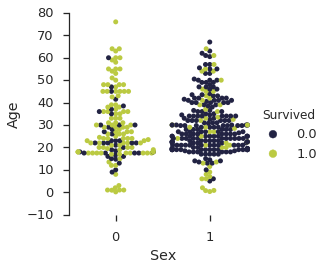

In [50]:
modelresults = FinalTest
modelresults["Survived"] = Tsurvived
sns.factorplot(x="Sex", y="Age", hue="Survived", kind="swarm", data=modelresults)
sns.despine(bottom=True)

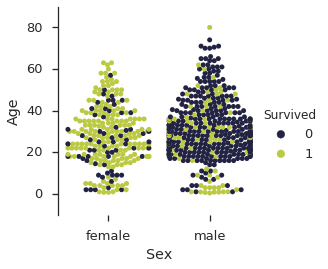

In [51]:
sns.factorplot(x="Sex", y="Age", hue="Survived", kind="swarm", data=traindf, order=['female','male'])
sns.despine(bottom=True)

In [55]:
scaledTrainX = preprocessing.scale(FinalTrainX)
scaledTestX = preprocessing.scale(FinalTestX)
scaledTrainX

array([[-0.49729484, -0.50244517, -0.47367361, ..., -1.2316449 ,
         1.4322604 , -0.2734756 ],
       [ 0.65162818,  0.78684529, -0.47367361, ..., -1.2316449 ,
         1.4322604 , -0.2734756 ],
       [-0.21006408, -0.48885426, -0.47367361, ...,  0.81192233,
        -0.69819706, -0.2734756 ],
       ..., 
       [-0.88613347, -0.17626324,  2.00893337, ..., -1.2316449 ,
         1.4322604 , -0.2734756 ],
       [-0.21006408, -0.04438104, -0.47367361, ...,  0.81192233,
        -0.69819706, -0.2734756 ],
       [ 0.22078205, -0.49237783, -0.47367361, ...,  0.81192233,
        -0.69819706, -0.2734756 ]])

In [61]:
from sklearn import svm
from sklearn.cross_validation import train_test_split

C = 1  # SVM regularization parameter
X_train, X_test, y_train, y_test = train_test_split(scaledTrainX, FinalTrainY, test_size=0.4, random_state=0)

svc = svm.SVC(kernel='linear', C=C).fit(X_train, y_train)
rbf_svc = svm.SVC(kernel='rbf', gamma=0.7, C=C).fit(X_train, y_train)
poly_svc = svm.SVC(kernel='poly', degree=3, C=C).fit(X_train, y_train)
lin_svc = svm.LinearSVC(C=C).fit(X_train, y_train)

print svc.score(X_test, y_test)
print rbf_svc.score(X_test, y_test)
print poly_svc.score(X_test, y_test)
print lin_svc.score(X_test, y_test)

print"The cross validation scores are: {0}".format(cross_val_score(lin_svc, scaledTrainX, FinalTrainY))
lsvc_predicted = cross_val_predict(lin_svc, scaledTrainX, FinalTrainY)
print "Precision: {0}".format(metrics.precision_score(FinalTrainY, lsvc_predicted))
print "Recall: {0}".format(metrics.recall_score(FinalTrainY, lsvc_predicted))
print "The F1 score is: {0}".format(metrics.f1_score(FinalTrainY, lsvc_predicted))



0.792717086835
0.770308123249
0.764705882353
0.803921568627
The cross validation scores are: [ 0.78787879  0.81481481  0.80808081]
Precision: 0.75786163522
Recall: 0.704678362573
The F1 score is: 0.730303030303


In [70]:
lin_svc = svm.LinearSVC(C=C).fit(scaledTrainX, FinalTrainY)
lin_svcpred = lin_svc.predict(scaledTestX)
lin_svcpred

array([ 0.,  0.,  0.,  0.,  1.,  0.,  1.,  0.,  1.,  0.,  0.,  0.,  1.,
        0.,  1.,  1.,  0.,  0.,  1.,  1.,  0.,  0.,  1.,  0.,  0.,  0.,
        1.,  0.,  0.,  0.,  0.,  0.,  1.,  1.,  0.,  0.,  1.,  1.,  0.,
        0.,  0.,  0.,  0.,  1.,  1.,  0.,  0.,  0.,  1.,  1.,  0.,  0.,
        1.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  1.,  0.,
        1.,  1.,  0.,  0.,  0.,  1.,  0.,  1.,  1.,  1.,  0.,  0.,  1.,
        0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  1.,  1.,  0.,  1.,
        0.,  1.,  0.,  0.,  0.,  1.,  0.,  1.,  0.,  1.,  0.,  0.,  0.,
        1.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  1.,  1.,  1.,  0.,  0.,
        0.,  0.,  1.,  1.,  0.,  1.,  0.,  0.,  1.,  0.,  1.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  1.,  0.,
        0.,  0.,  0.,  1.,  0.,  0.,  0.,  1.,  0.,  0.,  1.,  0.,  0.,
        1.,  1.,  0.,  1.,  1.,  0.,  1.,  0.,  0.,  1.,  0.,  0.,  1.,
        1.,  0.,  0.,  0.,  0.,  0.,  1.,  1.,  0.,  1.,  1.,  0

In [71]:
svcresults = pd.DataFrame(FinalTest["PassengerId"])
svcresults["Survived"] = lin_svcpred.astype(int)
svcresults.head(5)

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1


In [72]:
svcresults.to_csv("/Users/jreinhart/Desktop/Data Analysis Github/Titanic Kaggle/svcResults.csv", index = False)

## Scored .75598

In [73]:
from tpot import TPOTClassifier

pipeline_optimizer = TPOTClassifier(generations=50, population_size=25, num_cv_folds=5, random_state=42, verbosity=2)

In [74]:
pipeline_optimizer.fit(FinalTrainX, FinalTrainY)
print(pipeline_optimizer.score(FinalTrainX, FinalTrainY))

GP Progress:   2%|▏         | 25/1275 [00:02<33:28,  1.61s/pipeline]

Generation 1 - Current best internal CV score: 0.799677082422


GP Progress:   4%|▍         | 48/1275 [00:00<32:49,  1.60s/pipeline]

Generation 2 - Current best internal CV score: 0.808901681353


GP Progress:   6%|▌         | 71/1275 [00:00<50:08,  2.50s/pipeline]

Generation 3 - Current best internal CV score: 0.808901681353


GP Progress:   8%|▊         | 97/1275 [00:00<1:13:03,  3.72s/pipeline]

Generation 4 - Current best internal CV score: 0.809810772262


GP Progress:   9%|▉         | 120/1275 [00:00<26:16,  1.37s/pipeline]

Generation 5 - Current best internal CV score: 0.809810772262


GP Progress:  12%|█▏        | 148/1275 [00:00<26:21,  1.40s/pipeline]

Generation 6 - Current best internal CV score: 0.809810772262


GP Progress:  14%|█▎        | 174/1275 [00:00<20:13,  1.10s/pipeline]

Generation 7 - Current best internal CV score: 0.815118250005


GP Progress:  16%|█▌        | 201/1275 [04:57<19:14,  1.07s/pipeline]

Generation 8 - Current best internal CV score: 0.815118250005


GP Progress:  18%|█▊        | 224/1275 [00:00<33:07,  1.89s/pipeline]

Generation 9 - Current best internal CV score: 0.815118250005


GP Progress:  19%|█▉        | 248/1275 [00:00<50:03,  2.92s/pipeline]

Generation 10 - Current best internal CV score: 0.815118250005


GP Progress:  21%|██▏       | 273/1275 [00:00<22:52,  1.37s/pipeline]

Generation 11 - Current best internal CV score: 0.815118250005


GP Progress:  23%|██▎       | 296/1275 [00:00<22:08,  1.36s/pipeline]

Generation 12 - Current best internal CV score: 0.815118250005


GP Progress:  25%|██▌       | 323/1275 [00:00<21:20,  1.34s/pipeline]

Generation 13 - Current best internal CV score: 0.815118250005


GP Progress:  27%|██▋       | 348/1275 [00:00<25:29,  1.65s/pipeline]

Generation 14 - Current best internal CV score: 0.815118250005


GP Progress:  29%|██▉       | 370/1275 [00:00<21:07,  1.40s/pipeline]

Generation 15 - Current best internal CV score: 0.815118250005


GP Progress:  31%|███       | 397/1275 [00:00<35:23,  2.42s/pipeline]

Generation 16 - Current best internal CV score: 0.815118250005


GP Progress:  33%|███▎      | 423/1275 [00:00<28:48,  2.03s/pipeline]

Generation 17 - Current best internal CV score: 0.815118250005


GP Progress:  35%|███▌      | 448/1275 [00:00<34:20,  2.49s/pipeline]

Generation 18 - Current best internal CV score: 0.815118250005


GP Progress:  37%|███▋      | 472/1275 [00:00<37:07,  2.77s/pipeline]

Generation 19 - Current best internal CV score: 0.815118250005


GP Progress:  39%|███▉      | 498/1275 [00:00<20:31,  1.58s/pipeline]

Generation 20 - Current best internal CV score: 0.815350163926


GP Progress:  41%|████      | 521/1275 [00:00<18:49,  1.50s/pipeline]

Generation 21 - Current best internal CV score: 0.815350163926


GP Progress:  43%|████▎     | 548/1275 [00:00<16:29,  1.36s/pipeline]

Generation 22 - Current best internal CV score: 0.815350163926


GP Progress:  45%|████▍     | 572/1275 [00:00<1:26:28,  7.38s/pipeline]

Generation 23 - Current best internal CV score: 0.815350163926


GP Progress:  47%|████▋     | 598/1275 [00:00<15:02,  1.33s/pipeline]

Generation 24 - Current best internal CV score: 0.815350163926


GP Progress:  49%|████▉     | 624/1275 [00:00<26:05,  2.40s/pipeline]

Generation 25 - Current best internal CV score: 0.815350163926


GP Progress:  51%|█████     | 649/1275 [00:00<16:41,  1.60s/pipeline]

Generation 26 - Current best internal CV score: 0.815350163926


GP Progress:  53%|█████▎    | 673/1275 [00:00<13:48,  1.38s/pipeline]

Generation 27 - Current best internal CV score: 0.815350163926


GP Progress:  55%|█████▍    | 697/1275 [00:00<13:21,  1.39s/pipeline]

Generation 28 - Current best internal CV score: 0.815350163926


GP Progress:  57%|█████▋    | 722/1275 [00:00<17:04,  1.85s/pipeline]

Generation 29 - Current best internal CV score: 0.815350163926


GP Progress:  59%|█████▊    | 749/1275 [00:00<11:53,  1.36s/pipeline]

Generation 30 - Current best internal CV score: 0.815350163926


GP Progress:  61%|██████    | 772/1275 [00:00<13:26,  1.60s/pipeline]

Generation 31 - Current best internal CV score: 0.815350163926


GP Progress:  63%|██████▎   | 798/1275 [00:00<12:27,  1.57s/pipeline]

Generation 32 - Current best internal CV score: 0.815350163926


GP Progress:  64%|██████▍   | 822/1275 [00:00<11:48,  1.56s/pipeline]

Generation 33 - Current best internal CV score: 0.815350163926


GP Progress:  66%|██████▋   | 847/1275 [00:00<28:53,  4.05s/pipeline]

Generation 34 - Current best internal CV score: 0.815350163926


GP Progress:  69%|██████▊   | 874/1275 [00:00<08:55,  1.34s/pipeline]

Generation 35 - Current best internal CV score: 0.815350163926


GP Progress:  71%|███████   | 899/1275 [00:00<08:14,  1.32s/pipeline]

Generation 36 - Current best internal CV score: 0.815350163926


GP Progress:  72%|███████▏  | 921/1275 [00:00<34:48,  5.90s/pipeline]

Generation 37 - Current best internal CV score: 0.815350163926


GP Progress:  74%|███████▍  | 948/1275 [00:00<07:24,  1.36s/pipeline]

Generation 38 - Current best internal CV score: 0.815350163926


GP Progress:  76%|███████▌  | 972/1275 [00:00<08:09,  1.62s/pipeline]

Generation 39 - Current best internal CV score: 0.815350163926


GP Progress:  78%|███████▊  | 1000/1275 [00:00<33:08,  7.23s/pipeline]

Generation 40 - Current best internal CV score: 0.815350163926


GP Progress:  80%|████████  | 1024/1275 [00:00<11:05,  2.65s/pipeline]

Generation 41 - Current best internal CV score: 0.815350163926


GP Progress:  82%|████████▏ | 1048/1275 [00:00<06:32,  1.73s/pipeline]

Generation 42 - Current best internal CV score: 0.815350163926


GP Progress:  84%|████████▍ | 1071/1275 [00:00<04:33,  1.34s/pipeline]

Generation 43 - Current best internal CV score: 0.815350163926


GP Progress:  86%|████████▌ | 1095/1275 [00:00<10:44,  3.58s/pipeline]

Generation 44 - Current best internal CV score: 0.815350163926


GP Progress:  88%|████████▊ | 1125/1275 [00:00<03:40,  1.47s/pipeline]

Generation 45 - Current best internal CV score: 0.815350163926


GP Progress:  90%|████████▉ | 1145/1275 [00:00<04:19,  2.00s/pipeline]

Generation 46 - Current best internal CV score: 0.815350163926


GP Progress:  92%|█████████▏| 1174/1275 [00:00<01:37,  1.04pipeline/s]

Generation 47 - Current best internal CV score: 0.815350163926


GP Progress:  94%|█████████▍| 1199/1275 [00:00<02:30,  1.98s/pipeline]

Generation 48 - Current best internal CV score: 0.815350163926


GP Progress:  96%|█████████▌| 1223/1275 [00:00<01:26,  1.66s/pipeline]

Generation 49 - Current best internal CV score: 0.815350163926


GP Progress:  98%|█████████▊| 1249/1275 [00:00<00:54,  2.10s/pipeline]

Generation 50 - Current best internal CV score: 0.815350163926



Best pipeline: GradientBoostingClassifier(ZeroCount(StandardScaler(input_matrix)), 0.23999999999999999, 0.69000000000000006)
0.959999041319


In [75]:
print(pipeline_optimizer.score(FinalTrainX, FinalTrainY))
pipeline_optimizer.export('/Users/jreinhart/Desktop/Data Analysis Github/Titanic Kaggle/tpot_Titanic_pipeline.py')

0.959999041319


In [76]:
from sklearn.cross_validation import train_test_split
from sklearn.ensemble import GradientBoostingClassifier, VotingClassifier
from sklearn.pipeline import make_pipeline, make_union
from sklearn.preprocessing import FunctionTransformer, StandardScaler
from tpot.operators.preprocessors import ZeroCount

exported_pipeline = make_pipeline(
    StandardScaler(),
    ZeroCount(),
    GradientBoostingClassifier(learning_rate=0.24, max_features=0.24, n_estimators=500)
)

exported_pipeline.fit(FinalTrainX, FinalTrainY)
Tpotresults = exported_pipeline.predict(FinalTestX)

In [79]:
finalTpotresults = pd.DataFrame(FinalTest["PassengerId"])
finalTpotresults["Survived"] = Tpotresults.astype(int)
finalTpotresults.head(5)

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1


In [80]:
finalresults.to_csv("/Users/jreinhart/Desktop/Data Analysis Github/Titanic Kaggle/Tpot.csv", index = False)

## Tpot Scored .74641